# Bayesian A/B Testing

**The story of your future-self ...**

Imagine that 6 months down to the load you start interviewing a unicorn eCommerce company `AMAZING` for a product data scientist position. Here is an open-end question you are asked: 

The company wants to launch a new feature in order to improve the conversion rate of their website visitors. 

- What will you do to test whether the new feature working or not?

- What metrics are you going use to evaluate the performance of the new feature?

- To what extend that the new feature is better than the old one?

- In case that company is limited by budget (i.e. time, money, people), how soon can you provide some useful results? such as whether the new feature works or not? by how much (better than the old one)?

![](images/ecom-ab-testing.png)
[source](https://howuku.com/blog/what-is-conversion-rate-optimization/)

**Objectives**

You can count today a success if you can... 

- Compare and Contrast Frequentist vs Bayesian Mindsets for A/B testing
- Perform A/B Testing under a Bayesian Framework
- Explain what a conjugate prior is
- Explain why Bayesian A/B Testing is _Bayesian_

**Road-map**

1. Review Frequentist Hypothesis Testing
2. Introduce Beta Distribution
3. How to use Beta Distribution
4. Actually do the original A/B test
5. Answer the question... What's the probability that site B is better than site A?
6. Answer Why do we call this Bayesian A/B Testing?

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from utils import *
plt.style.use('ggplot')

## 1. Review of Frequentist Hypothesis Testing

Steps:

1. Define your null hypothesis.
2. Define the alpha (significance) cutoff.
3. Determine how many samples you'll need for a given effect size and significance level (the power).
3. Collect data.
4. Compute the appropriate statistic (e.g. the t-statistic).
5. Compute the probability of that statistic (or something more rare) under the null hypothesis. (aka, the p-value)
6. "Reject" or "fail to reject" the null hypothesis.

For example,

Say our company goal is to have our website generate new users with a conversion rate of 10%. Let's do a hypothesis test to see if we are hitting our goal.

**Step 1:**

Define the null hypothesis as "the conversion rate is 10%", i.e. $\mu = 0.1$  Alternate, "the conversion rate is not 10%" $\mu \ne 0.1$

In [2]:
null_hypot_mu = 0.1

**Step 2:**

Define the significance level (alpha cutoff). We'll use the typical 5% type-I error rate, and choose a two-tailed test.

In [3]:
alpha_cutoff = 0.05

**Step 3:**

The data is a series of bernoulli trials (a binomial distribution)- either a person converts or they don't.  The Null hypothesis is the proportion that convert, p, is 0.1, of 1 in 10.  

Need a power calculation for 2-sided one-sample binomial test.

Oh look.  [Here](http://powerandsamplesize.com/Calculators/Other/1-Sample-Binomial) is a one-sample binomial test power calculator.  Let's use it with an effect size of 1% (0.01).

In [4]:
# from the calculator
n = 7670

**Step 4:**

Collect data. Here it is:

In [5]:
samples = 1*(np.random.random(n)>1 - .11)
print('A few results: ', samples)
print('Conversions: ',samples.sum())
print('Non-conversions: ', len(samples)-samples.sum())
print('Conversion rate: ', samples.mean())

A few results:  [0 0 1 ... 0 0 0]
Conversions:  859
Non-conversions:  6811
Conversion rate:  0.11199478487614081


**Step 5 and 6:**  
 
The [binomial test](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom_test.html) tests whether a proportion (such as the mean number of clicks) is equal to some value.  

In [6]:
from scipy.stats import binom_test

successes = samples.sum()
trials = len(samples)

p_value = stats.binom_test(successes, trials, null_hypot_mu)

print('p value: ', p_value)

p value:  0.0005696984157087979



#### Concept of P-value

>The probability of observing data at least as extreme as the observation given the null hypothesis

> Because the null hypothesis is all about 'nothing different, no change'. If you stick to your routine and boring assumption called null hypothesis, how shocking you will feel when you see such rare evidence happens. The smaller the probability of the evidence, the more shocking you feel. --Paul.Wu

#### What's wrong with the traditional hypothesis testing?

Say our company is rolling out an A/B test to determine if the new "Click to Shop" Button is improving our clickthrough rates? 

You go through all the steps a frequentist would and find a p_value lower than your original alpha value. You head to the stakeholders meeting and say... 

    "Assuming that our new button is not better than our original, I feel confident that would not see this data (or something more rare) if I sampled from this site over-and-over-and-over... forever. so we can claim that we have a higher CTR using our new button. - nothing is ever certain but we are happily confident that our Null Hypothesis can be rejected."  

Not only is it a mouthful but wouldn't it be nice to come to your stakeholders with a phrase you can get behind like ... 

    "It is 98% likely that site B has a higher CTR than site A"
    

### What could be done with the pain-point of frequentist hypothesis testing?

Wouldn’t it be nice if, instead, we could give a **distribution of probability**, rather than **yes  or no**, of a ***hypothesis*** given the ***data***?

This is where bayesian statistics comes in.

## Let's do Bayesian A/B Testing

So, we know how to run hypothesis tests (from the **frequentist** world), and we can do **A/B testing via hypothesis testing**, of course.

But now let's do **A/B testing under a Bayesian framework**.


**Quick question1**  What do we use to model uncertainty about female heights? 

**Quick question2** What do we use to model the uncertainty of a probability? 

Which distribution do we know that will allow us to say:

    "It is 98% likely that site B has a higher CTR than site A"

In [ ]:
# it's even better to says: 95 out of 100 times, it is from 97% to 99% likely that site B has a higher CTR than site A.

## 2. The Beta Distribution: $\text{Beta}(\alpha, \beta)$

The Beta Distribution is a **probability distribution on probabilities**. In other words, it is used to model probabilities.


> First, define p as the probability of landing a head. If the coin is fair, then it is most likely that the coin will land head half of the time. In this case, p = 50% is the most likely value for p. But wait, it is also possible to have an unfair coin that behaves accidentally like a fair coin. So we cannot rule out the possibility that the coin is unfair, even if we observe heads half of the time.


##### Parameters

The beta distribution has two hyper-parameters (also known as "shape parameters"):
- $\alpha > 0$: we will use this to encode the number of `successes` of a website (more on that later)
- $\beta > 0$: we will use this to encode the number of `failures` of a website (more on that later)

You can choose the $\alpha$ and $\beta$ parameters however you think they are supposed to be. For example, if you think the probability of success is very high, let’s say 90%, set 90 for $\alpha$ and 10 for $\beta$. Again more on this later...


0.4628311659999997

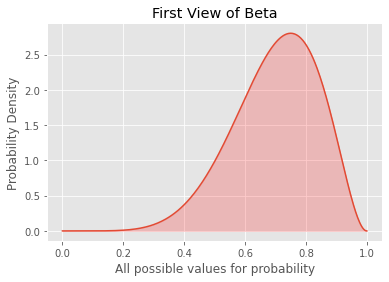

In [7]:
# Imagine we get 7 heads and 3 tails... 
alpha = 7
beta = 3

dist = stats.beta(alpha, beta)
x = np.linspace(0.0, 1.0, 301)

# The probability density at each sample support value.
y = dist.pdf(x)

fig, ax = plt.subplots()
lines = ax.plot(x, y)
ax.fill_between(x, y, alpha=0.2, color='red')
    
ax.set_title('First View of Beta')
# ax.get_yaxis().set_ticks([])
ax.set_xlabel('All possible values for probability')
ax.set_ylabel('Probability Density')
dist.cdf(0.7)

> **Tips for code re-use**: always put your useful code into function, class etc. and save them in a file (e.g. `utils.py`) that your computer can easily find (e.g. `~/bin`). [Reference: Bash Profile](https://github.com/GalvanizeDataScience/primers/blob/master/bash-profile.md)  


#### Hand-on: create a function `plot_beta()` 
that plots the Beta distribution PDF with given parameters alpha and beta

In [8]:
def plot_beta(alpha, beta, ax=None, title="", xlabel="",ylabel="", label=""):
    """plot the Beta distribution PDF with parameters alpha and beta
    Args
    ----
        alpha (positive number)
        beta (positive number)
        
    Example
    -------
    from ipywidgets import interactive, FloatSlider, IntSlider, fixed
    from IPython.display import display, Image

    fig, ax = plt.subplots()

    plot=interactive(plot_beta,
                     alpha=IntSlider(min=1,max=35,step=1,value=1),
                     beta=IntSlider(min=1,max=35,step=1,value=1),
                     ax=fixed(None), #fix other arguments
                     title=fixed(""), 
                     xlabel=fixed(""),
                     ylabel=fixed(""),
                     label=fixed("")
                    )
    display(plot)
    """
    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 301)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    if ax is None:
        fig, ax = plt.subplots()
    xticks=[0.0, 0.5, 1.0]
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    else:
        ax.set_title(f'Beta distribution alpha={alpha}, beta={beta} ')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, min(np.max(y)*1.2,100))

interactive(children=(IntSlider(value=1, description='alpha', max=35, min=1), IntSlider(value=1, description='…

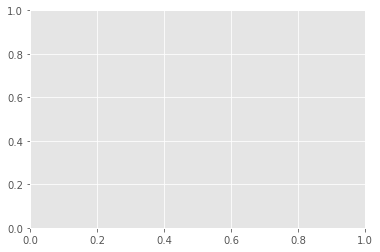

In [9]:
from ipywidgets import interactive, FloatSlider, IntSlider, fixed
from IPython.display import display, Image

fig, ax = plt.subplots()
        
plot=interactive(plot_beta,
                 alpha=IntSlider(min=1,max=35,step=1,value=1),
                 beta=IntSlider(min=1,max=35,step=1,value=1),
                 ax=fixed(None), #fix other arguments
                 title=fixed(""), 
                 xlabel=fixed(""),
                 ylabel=fixed(""),
                 label=fixed("")
                )
display(plot)


### The Properties of Beta Distribution (optional)
**NOTE: knowing the pdf and ${B(\alpha, \beta)}$ piece is not in your success criteria, but if you are interested here is some information about the Distribution.**

Support: $x \in [0, 1]$

PDF: $f(x) = \dfrac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)}$

where $B(\alpha, \beta) = \dfrac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$

where $\Gamma(x)$ is an extension of the factorial function which works for a wider range of input (like any positive real value)

**Get a feel for the Beta Distribution:**

Let's plot a few Beta Distributions (with varying shape parameters).

### Note:

- A key property of the beta distribution is that it is constrained to the range of 0 to 1. This is different than some other distributions that extend from $-\infty$ to $+\infty$ or $0$ to $+\infty$.

- This constraint makes it useful for modeling the $p$ parameter of a bernoulli or binomial distribution, which we know can only take values between 0 and 1.

- As we will see in a minute, this correspondence between $\beta$ and $p$ is more than just superficial. 

**What patterns do you see in the above distributions?**

Here are a few:
* If $\alpha$ is larger than $\beta$, the distribution is shifted to the **right** and skewed to the left.
* If $\alpha$ is smaller than $\beta$, the distribution shifted to the **left** and skewed to the right.
* If $\alpha = \beta$, the distribution is **symmetric** and **centered** at $0.5$.
* The distribution gets **skinnier** as $\alpha$ and $\beta$ increase.

Linking $\alpha$ and $\beta$ to the moments:

The **mean** of the Beta Distribution is: $E(X) = \dfrac{\alpha}{\alpha + \beta}$

The **variance** of the Beta Distribution is: $\text{Var}(X) = \dfrac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

### 3. How we can use the Beta Distribution: estimating beta dist. from conversion data

What if we set:
- $\alpha = 1 + \text{number of conversions on our website}$
- $\beta = 1 + \text{number of misses on our website}$
- $\alpha + \beta = 2 + \text{total number of visits to website}$

Then, as we know, the **mean of the beta distribution** would be $\dfrac{\alpha}{\alpha + \beta}$ which equals smoothed **conversion rate**!

If we think of $\alpha$ as "Wins" or "Heads" and $\beta$ as "Losses" or "Tails", then 

$$\alpha + \beta = flips$$

and 

$$\frac{\alpha}{\alpha + \beta}=\frac{Heads}{Flips}$$

is the probability of heads, which is the $p$ of a bernoulli or binomial distribution.

Also, the more visitors we have (i.e. the larger $(\alpha + \beta)$), then the **smaller the variance of our beta distribution will be**.

Put all this together, **_the beta distribution models the probability of the conversion rate_** of our website (which we are trying to figure out from our data). The beta distribution is one way to model our **belief** of what the conversion rate might be.

A continuous probability distribution (like the beta distribution) puts relative likelihoods to each of the values in the support. In our case, the support is theorized conversion rates. On the y-axis of the PDF we have probability density, and on the x-axis of the PDF we have probabilities (all the possible values of conversion rate). So we have probabilities of probabilities (relative probability of conversion rates.)

**Why we like it:** The reason we like it is that this lets us know the **strength of our belief** about the conversion rate of our website. 



QUESTION: Are all of these conversion rates the same? 

$$ \frac{2}{10} =\frac{20}{100}=\frac{200}{1000} $$



#### Hand-on: create a function `estimate_beta_params()`:
that estimates the alpha & beta parameters of beta distribution by fitting Beta distribution to the conversion data.

#### Hand-on: create a function `plot_beta_from_data()`
that first estimates the Beta distribution parameters from data and then plots the Beta PDF distribution.
  

In [ ]:
def estimate_beta_params(data):
    """Estimate the alpha & beta parameters of beta distribution by fitting Beta distribution to the conversion data 
    Args
    ----
        data: a list of 0 (miss) or 1 (convert) or a 1-D np.array
    return
    ------
        Alpha: number of successes +1
        Beta: Number of failures +1
        Mean: conversion rate
        num_conversions & total_visitors: used to make labels on graphs 
    
    """
    #array of website conversions... zeros and ones (convert or didnt convert)
    website_samples = np.array(data)
    
    #total number of conversions
    num_conversions = website_samples.sum()
    #total number of datapoints
    total_visitors = len(website_samples)
    
    #plus one to set a and beta as uniform priors...try other numbers to see the changes
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    
    #mean number of conversions... aka conversion rate
    mean = 1 * num_conversions / total_visitors

    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_from_data(data, ax=None, label=None):
    """First estimate the Beta distribution parameters from data and then plot the Beta PDF distribution
    Args
    ----
        data: a list of 0 (miss) or 1 (convert)
    
    """
    alpha, beta, mean, num_conversions, total_visitors = estimate_beta_params(data)
    title =  r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax=ax, title=title, xlabel="Conversion Rate", ylabel="Probability Density", label=label)


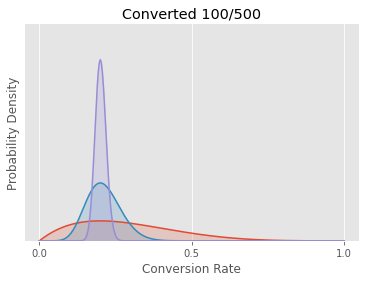

In [13]:
fig, ax = plt.subplots()
plot_beta_from_data([0, 1, 0, 0, 0]*1, ax=ax)
plot_beta_from_data([0, 1, 0, 0, 0]*10, ax=ax)

plot_beta_from_data([0, 1, 0, 0, 0]*100, ax=ax)

In [16]:
[0, 1, 0, 0, 0]*5

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]

### What do you find from these three graphs?
* $\frac{2}{10}$ conversion suggests the conversion rate is about $p=0.2$, but values of $p$ in the range of $0.05$ to $0.45$ would not be unreasonable
* $\frac{20}{100}$ also suggests $p=0.2$ and less probability of values of $p$ far from $0.2$
* $\frac{200}{1000}$ indicates $p=0.2$ or some number quite close to $0.2$. No value far from $0.2$ is reasonable.


It is clear that we can use this distribution to model both 

(1) our belief of the conversion rate based on the data we have (i.e. via the mean), and 

(2) the strength of our belief (i.e. via the variance).

**A good Bayesian never claims to know anything exactly. Instead they have some beliefs, and they have various levels of strengths regarding their beliefs.**

## 4. Bayesian A/B testing

We're finally ready to do the Bayesian A/B testing.

Say we have two versions of our website: version A and version B (version C we'll use later).

Let's read in the log of our historical visitors for both version A and version B.

A .npz file contains saved numpy arrays using [.savez](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.savez.html#numpy.savez).

In [17]:
x = np.load("samples.npz")
list(x.keys())

['site_B_samples', 'site_C_samples', 'site_A_samples']

In [18]:
# take a peek at the data
x['site_A_samples'][:20]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [19]:
# how many total?
print("Shape A: ", x['site_A_samples'].shape)
print("Shape B: ", x['site_B_samples'].shape)

Shape A:  (10000,)
Shape B:  (10000,)


In [20]:
# load in a subset
n = 200
site_A_samples = x['site_A_samples'][:n]
site_B_samples = x['site_B_samples'][:n]

np.mean(site_A_samples), np.mean(site_B_samples)

#can we stop there and be content that site_B_samples have a higher average?

(0.215, 0.245)

Now let's plot our belief about each site's conversion rate.

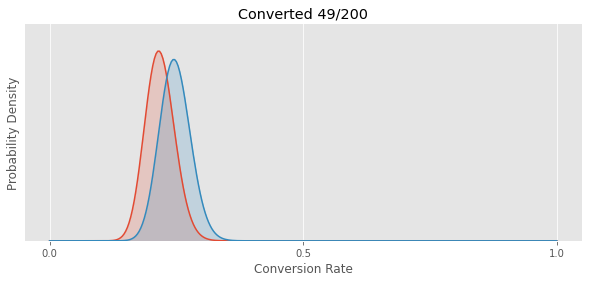

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

plot_beta_from_data(data=site_A_samples, ax=ax)
plot_beta_from_data(data=site_B_samples, ax=ax)


## Let's look at how the distributions evolve as data rolls in

#### Hand-on: create a function `compare_AB_conversion_rate()`
that compares the conversion rate of 2 different solutions A & B


In [23]:
def compare_AB_conversion_rate(site_A_data, site_B_data, n=None):
    """compare the conversion rate of 2 different solutions A & B
    Args
    ----
        site_A_data (1-D np.array of shape (N,))
        site_B_data (1-D np.array of shape (N,))
        n (int): use a sub list of samples[:n]
    Return
    ------
        a plot comparing the conversion rate of site A and that of site B.
    """
    ax = plt.subplot()
    if n is None:
        n = min(len(site_A_data), len(site_A_data))
    site_A_samples = site_A_data[:n]
    site_B_samples = site_B_data[:n]
    plot_beta_from_data(site_A_samples, ax, label="Site A")
    plot_beta_from_data(site_B_samples, ax, label="Site B")
    plt.title(f'after {n} visitors')
    plt.show()
    

In [24]:

interactive(compare_AB_conversion_rate, 
            n = IntSlider(min=1,max=len(x['site_A_samples']),step=10,value=1),
            site_A_data=fixed(x['site_A_samples']), 
            site_B_data=fixed(x['site_B_samples'])
           )

interactive(children=(IntSlider(value=1, description='n', max=10000, min=1, step=10), Output()), _dom_classes=…

### 5. Important question: What's the probability that site B is better than site  A?
Let's figure out how much of site B's Beta distribution is to the right of site A's.

To do this, all we have to do is to take the integral of this function:

$f(x) = \dfrac{x^{\alpha - 1} (1-x)^{\beta - 1}*{\Gamma(\alpha)\Gamma(\beta)}}{{\Gamma(\alpha + \beta)}}$

Where $\Gamma$ is, of course the well-known gamma function.

As it turns out, this calculation is somewhat difficult, but we can take a shortcut using *Monte Carlo* simulation. This shortcut is widely used among data scientists and data engineers. 

> When you can not find a theoretical solution for a complex math problem, consider solve it numerically OR by simulation experiment.

To be specific, we simply **draw a large number of random samples from each distribution, and count how many times B's samples are greater than A's.**

The code is short and easy:

In [25]:
num_simulations = 100_000

#Let's just grab our Alpha and betas from site_A
alpha, beta = estimate_beta_params(site_A_samples)[:2]
print(f'Site_A alpha and beta {alpha, beta}')
#Set up first distribution
dist_A = stats.beta(alpha, beta)

#Same steps for beta dist
alpha, beta = estimate_beta_params(site_B_samples)[:2]
print(f'Site_B alpha and beta {alpha, beta}')
dist_B = stats.beta(alpha, beta)

#randomly sample 100_000 data points from each distribution
simulated_A = dist_A.rvs(num_simulations)
simulated_B = dist_B.rvs(num_simulations)


print(f'On average, how many times is Bs Conversion Rate greater than As: {(simulated_B > simulated_A).mean()}')

Site_A alpha and beta (44, 158)
Site_B alpha and beta (50, 152)
On average, how many times is Bs Conversion Rate greater than As: 0.7604


Another way to look at this data is by plotting random samples from B against random samples of A. This creates a 'blob plot'. By measuring how much of the blob is above the *y=x* line, we can determine the probability that B is better than A.

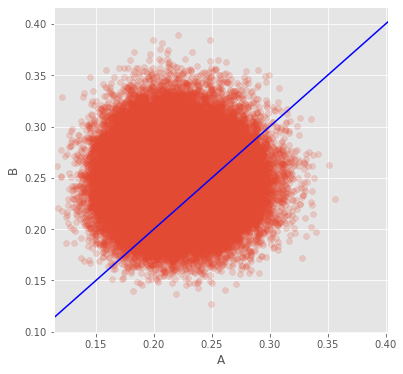

In [26]:
#scatter plot our different conversion rates sampled from our distributions
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(simulated_A, simulated_B, alpha = .2);
ax.set_xlim(plt.ylim())
ax.set_xlabel('A'), 
ax.set_ylabel('B')
ax.plot(plt.xlim(), plt.xlim(), color = 'blue');


#### Hand-On: create a function `compare_AB_by_simulations()`

- compute the probability that site B is better than site A
- create a 'blob plot': plotting random samples from B against random samples of A.  By measuring how much of the blob is above the y=x line, we can determine the probability that B is better than A.


In [27]:
interactive(compare_AB_by_simulations, 
            n = IntSlider(min=1,max=len(x['site_A_samples']),step=10,value=1),
            site_A_samples=fixed(x['site_A_samples']), 
            site_B_samples=fixed(x['site_B_samples']),
            num_simulations=fixed(100_000)
           )


interactive(children=(IntSlider(value=1, description='n', max=10000, min=1, step=10), Output()), _dom_classes=…

Translation: In our simulation, 94% of the time, site B is better than site A. We can then interpret this as a probability, meaning we can say:

> "It is 94% likely that site B is better than site A."

**CAN FREQUENTIST DO THAT?** No, they can NOT!

They can only say horribly unintelligible things like "the p-value of 0.11 does not support the decision to reject the null hypothesis at an $\alpha$ level of 0.05."

Who needs that crap?

### Reflection:

- In our model, `conversion` is a bernoulli process: it either happens or it doesn't. The `conversion rate`, the probability that it is going to happen, is a fixed value. i.e. *p* that does not change over time.

- The beta distribution gives us an **estimate of *p***, but as a distribution over a range of values, not a fixed value.

- Suppose we want to put some bounds on the range where the **true** value of *p* may be found. 

- We call this the `credible interval` and it's largely analogous to the `confidence interval` of conventional stats.

### What's the 95% credible interval of site B's conversion rate?

To calculate it, we measure `the area under the curve` that contains 95% of the data, or rather `the interval under the curve` that does not contain the first or last 2.5% of the data. 

Note that the distribution may be skewed, so these aren't necessarily symmetrical around the distribution mean.

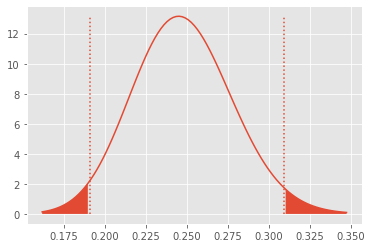

In [28]:
x = np.linspace(*dist_B.ppf([.001, .999]),101)
plt.plot(x, dist_B.pdf(x))
plt.vlines(dist_B.ppf([.025, .975]), ymin = 0, ymax = dist_B.pdf(x).max(), linestyles='dotted')
plt.fill_between(x, 0, dist_B.pdf(x), where = (x< dist_B.ppf(.025)) | (x > dist_B.ppf(.975) ));

In [29]:
interval_size = 0.95
tail_area = (1 - interval_size) / 2

print("{0:0.1f}% credible interval conversion rate lower bound: {1:0.3f}, upper bound {2:0.3f}".format(
       interval_size *100,
       dist_B.ppf(tail_area), 
       dist_B.ppf(1 - tail_area)))

# or if you are lazier
# dist_B.ppf([0.025, .975])

95.0% credible interval conversion rate lower bound: 0.191, upper bound 0.309


#### Hand-On: create a function `bayes_credible_interval()`
that computes and plots Bayesian credible interval

(0.1906208769346449, 0.3091628539525225)

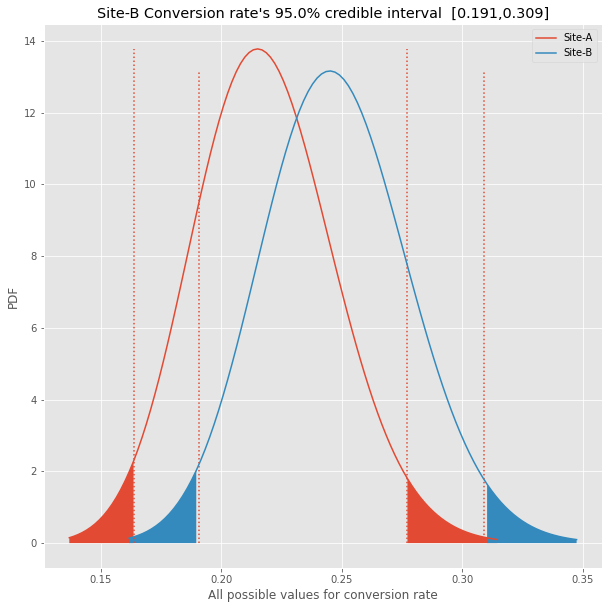

In [30]:
fig, ax = plt.subplots(figsize=(10,10))    
bayes_credible_interval(site_A_samples, interval_size = 0.95, ax=ax, title='Site-A')
bayes_credible_interval(site_B_samples, interval_size = 0.95, ax=ax, title='Site-B')

### What Benefits does Bayesian A/B Testing bring?

In general, Bayesian A/B testing is better for these reason:

1. You can say stuff like "It is x\% likely that site B is better than site A." Rather than saying "Assuming that site A performs the same as site B, there are (1-x)\% chance to see such data."

2. You can stop the test early based on surprising data (in business, time=money!).

3. You can has the most updated result when the test is still running.

## 6. Why do we call this Bayesian A/B Testing?

I haven't yet proved to you that what we did above is actually _correct_. All we've done is show that the Beta Distribution _seems_ to do what we want if we set $\alpha$ and $\beta$ to the number of conversions and failures, respectively. Let's work on showing _why_ this works.

We can derive it by beginning with Bayes' Theorem. First, let's just recall the theorem:

![](images/bayes-theorem-PHE.png)

- Hypothesis $H$ represents the random variable that is our unknown conversion rate

- Evidence $E$ is the number of conversions we've observed on the website to-date.

- the denominator on the right $P(E)$ is just a normalizing term, so we'll simplify it to:

$$P(H \, | \, E) \propto P(E\, | \, H) P(H)$$


**Baysian Thinking**: In the past we've only put `scalar values` into each part of the equation above, but now, what if we plugged `PDF equations` into each part?

- Our prior $P(H)$ will be a uniform distribution initially, meaning we don't have any initial belief about what values $H$ should be -- we see all values as equally likely (we don't _have_ to do it this way, but this will work fine).  We use the $H$ here, however, because it can give a uniform distribution initially but evolve as data comes in.

- Our likelihood distribution $P(E\, | \, H)$ is a Binomial distribution. It will tell us the likelihood of our data under various values of $H$. 

- the posterior distribution ($P(H \, | \, E)$) tells us what we actually want to know: the relative probability of each value of $H$ (i.e. the relative probability of each possible conversion rate).

$$
\begin{align*}
P(H =\Theta\, | \, E=y) &\propto P(E=y \, | \, H=\Theta) * P(H=\Theta) \\
P(\Theta \, | \, y) &\propto P(y \, | \, \Theta) * P(\Theta) \\
P(\Theta \, | \, y) &\propto \text{Binomial}(n, \Theta) * \text{Beta}(\alpha, \beta) \\
P(\Theta \, | \, y) &\propto {n \choose y} \Theta^y (1-\Theta)^{n-y} * \dfrac{\Theta^{\alpha - 1} (1-\Theta)^{\beta - 1}}{B(\alpha, \beta)} \\
P(\Theta \, | \, y) &\propto \Theta^y (1-\Theta)^{n-y} * \Theta^{\alpha - 1} (1-\Theta)^{\beta - 1} \\
P(\Theta \, | \, y) &\propto \Theta^{\alpha + y - 1} (1-\Theta)^{\beta + n - y - 1} \\
P(\Theta \, | \, y) &= \text{Beta}(\alpha' = \alpha + y, \, \, \beta' = \beta + n - y) \\
\end{align*}
$$


All that's to say, if you multiply a Beta distribution by a Binomial distribution, out pops a *new* Beta distribution:

$$\text{Beta} \propto \text{Binomial} * \text{Beta}$$

This relationship, where your prior and posterior are of the same distribution family, is called a `conjugate prior`.  The Beta distribution is a `conjugate prior` of the binomial distribution. There are many more [conjugate prior relationships.](https://en.wikipedia.org/wiki/Conjugate_prior)

![](images/conj_prior.png)

The derivation above shows that our process for modeling conversion rates on websites is sound. What's really going on is that we've found a short-cut way of applying Bayes' theorem to update our prior beliefs. We usually make our first prior just a uniform distribution by using a Beta distribution with $\alpha=1$ and $\beta=1$.

To recap, we model the conversion rate as a Beta distribution where:
- $\alpha = 1 + \text{number of success on our website}$
- $\beta = 1 + \text{number of failures on our website}$

This final plot shows how we can update our belief with more-and-more data to get stronger-and-stronger beliefs of the underlying conversion rate of our website. i.e. 

>We iteratively update our belief with new evidence so that it approach the real (but unknown) conversion rate.

In [31]:
x = np.load("samples.npz")

site_A_samples = x['site_A_samples']

len(site_A_samples), np.mean(site_A_samples)

(10000, 0.2055)

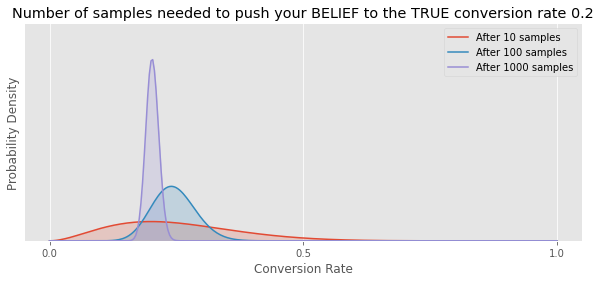

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

num_samples = [10, 100, 1000]  # , 10000

for k in num_samples:
    samples = site_A_samples[:k]
    plot_beta_from_data(samples, ax, label=f"After {k} samples")

ax.set_title("Number of samples needed to push your BELIEF to the TRUE conversion rate 0.2")
ax.legend();

#### Hand-on: create a function `plot_samplesize_belief_truth()`
that shows the number of samples needed to push your BELIEF to the TRUE conversion rate.
 

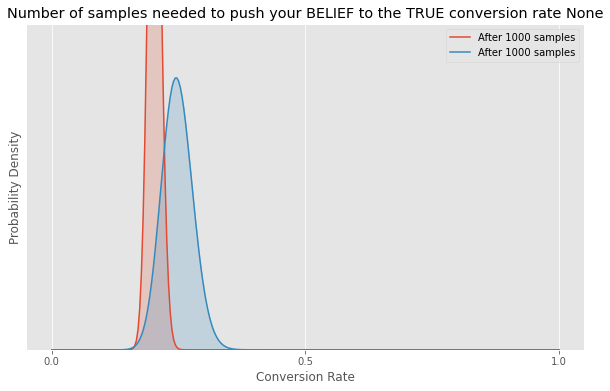

In [33]:

    
fig, ax = plt.subplots(figsize=(10,6))
plot_samplesize_belief_truth(site_A_samples, num_samples = [ 1000], ax=ax, true_rate=None)
plot_samplesize_belief_truth(site_B_samples, num_samples = [ 1000], ax=ax, true_rate=None)

# The End ...

## AB Testing: Frequentist vs Bayesian

![](images/frequentist-baysian-ab-testing.png)
[source*****](https://www.dynamicyield.com/lesson/bayesian-testing/)

## What is the benefits of  Bayesian AB Testing?

![](images/bayesian-ab-testing.png)
[source*****](https://www.dynamicyield.com/lesson/bayesian-testing/)

## What is the work-flow of Bayesian AB Testing?
![](images/bayes-flowchart.png)
[The Bayesian New Statistics*****](https://link.springer.com/article/10.3758/s13423-016-1221-4)

## Reflection: Bayesian Thinking and Doing

`Frequentist methods` were created before modern computers. Those methods lean on limits and integrals which can be done by hand and by theory. It's from those limits and integrals that they have to take the "long run" point of view.

`Bayesian methods` still build on the foundation of `laws of probability` and the well-known `distributions`, but Bayesians take a different approach to how they interpret probability, which fits better with our needs (usually). Bayesians love to build layers of distributions one atop the other, using Bayes' theorem to string them all together. Once built, they  visualize the final distribution by repeated sampling, requiring a lot of computation.

>Bayesian all is about how to iteratively keep updating your prior belief by the next piece of evidence, so that your belief is approaching the underlining truth.

All scientists love data. We love data because it helps us understand the world. That's why we like the Bayesian mindset. We believe things, we collect data, and we refine our beliefs. Then we repeat that. I leave you with this final _xkcd_.

<img src="https://imgs.xkcd.com/comics/the_difference.png" width=500px>

### References & Credits

- Lecture notebooks by Galvanize**r** Ryan, Heather, Frank

- [Why you should try the Bayesian approach of A/B testing](https://towardsdatascience.com/why-you-should-try-the-bayesian-approach-of-a-b-testing-38b8079ea33a)

- [Bayesian Testing](https://www.dynamicyield.com/lesson/bayesian-testing/)

- [The Bayesian New Statistics: Hypothesis testing, estimation, meta-analysis, and power analysis from a Bayesian perspective](https://link.springer.com/article/10.3758/s13423-016-1221-4)

- [Bayesian A/B testing — a practical exploration with simulations](https://towardsdatascience.com/exploring-bayesian-a-b-testing-with-simulations-7500b4fc55bc)